In [13]:
!pip install scikit-learn

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load and prepare data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df['label'] = (df['quality'] >= 7).astype(int)

X = df.drop(['quality', 'label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
# Pipeline and GridSearch
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200]},
             scoring='f1')

In [17]:
# Evaluation
y_pred = grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.86      0.58      0.69        43

    accuracy                           0.93       320
   macro avg       0.90      0.78      0.83       320
weighted avg       0.93      0.93      0.93       320

Confusion Matrix:
 [[273   4]
 [ 18  25]]


In [18]:
# Save model
joblib.dump(grid.best_estimator_, 'wine_quality_model.pkl')

['wine_quality_model.pkl']

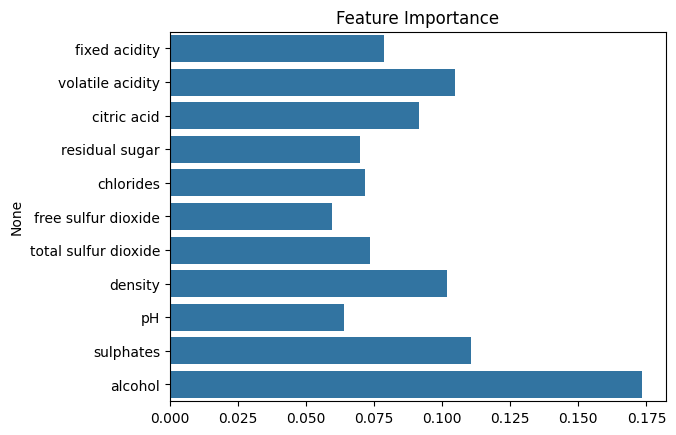

In [19]:
# Feature importance plot
model = grid.best_estimator_.named_steps['clf']
importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()
